# 1. Defining The Question.

### a) Specifying the Question







> As a football analyst in  Mchezopesa Ltd company, I have been tasked to prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly including rank in my training.



### b) Defining the Metric for Success



> My metric of success will be;


1.    predicting how many goals the home team scores.
2.    predicting how many goals the away team scores.
3.    Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

My results will be correct if;


*  Our RMSE score  is less than 20% of the target mean

*  Our accuracy score is 86% and above




### c) Understanding the context



> The men's FIFA World Ranking is a ranking system for men's national teams in association football, currently led by Belgium.[1] The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first. A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches.



### d) Recording the Experimental Design



> The following are the experimental design i took in order to complete this project:


*   Importing all the necessary libraries
*   Loading the datasets
*    Reading, tyding and merging the dataset  
*  Exploratory Data Analysis
*  Polynomial Regression
* Logistic Regression





### e) Data Relevance

We have two datasets, the fifa ranking and the result dataset.The datasets contain football matches in various tornaments since 1993 all the way to 2018, this means the data is time appropriate.It also contains the scores, the ranking, teams, tournament type. The dataset contains more than 50000 rows enough for building a model.

# 2. Reading The Data.

In [1]:
#importing our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# loading the fifa ranking dataset
ranking= pd.read_csv('/content/fifa_ranking.csv')

In [0]:
#loading the results dataset
results= pd.read_csv('/content/results.csv')

# 3. Checking The Data.

In [4]:
# Determining the no. of records in our datasets
#ranking dataset
print('the shape of ranking is:', ranking.shape)
#results dataset
print('the shape of results is:', results.shape)


the shape of ranking is: (57793, 16)
the shape of results is: (40839, 9)


In [5]:
# Previewing the top of our ranking dataset
ranking.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
# columns in the rank data set
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [7]:
# checking for null values
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [8]:
# checking for duplicates
ranking.duplicated().sum()

37

In [0]:
#dropping the duplicates
ranking = ranking.drop_duplicates(keep = 'first')

In [10]:
# confirming if the duplicates have been dropped
ranking.duplicated().any()

False

In [11]:
# Previewing the top of our results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [12]:
# columns in the results data set
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [13]:
# checking for null values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [14]:
# checking for duplicates
results.duplicated().sum()

0

In [15]:
# Checking whether each column has an appropriate datatype
print(results.info())
print('*******************************************************')
print(ranking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB
None
*******************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57756 non-null  int64  
 1   country_full             57756 non-null  object 
 2   co

# 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number.

In [16]:
ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000,57756.000000
mean,101.618118,121.971151,332.339965,-0.009938,61.751362,61.751362,60.953507,30.476830,59.734768,17.920469,59.114466,11.822922
std,58.635096,260.479191,302.964176,5.802788,138.042006,138.042006,137.712945,68.856514,136.319119,40.895761,135.540135,27.108034
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,91.500000,525.000000,1.000000,30.447500,30.447500,26.400000,13.200000,21.250000,6.380000,20.795000,4.162500
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [17]:
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# 5. Tidying the Dataset

In [0]:
#converting the date column to type datetime
 
import datetime
results['date'] = pd.to_datetime(results['date'])
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

In [0]:
# splitting the datetime column into month and year
results['year'], results['month'] = results['date'].dt.year, results['date'].dt.month
ranking['year'], ranking['month'] = ranking['rank_date'].dt.year, ranking['rank_date'].dt.month

In [20]:
# confirm the new column data types 
print(results.dtypes,'\n\n',ranking.dtypes)

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
month                  int64
dtype: object 

 rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetim

In [21]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [22]:
# drop date and rank date columns
results.drop('date', axis = 1, inplace = True), ranking.drop('rank_date', axis = 1, inplace = True)

(None, None)

In [0]:
# create a copy of home 
home_rank = ranking.copy()

In [24]:
# rename country full column
home_rank.rename({'country_full':'home_team'}, axis = 1, inplace = True)  
home_rank.head()

,rank,home_team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993,8


In [25]:
# merging the two datasets using home team, month, and year
# merge the data set home_rank and results
fifa_home = pd.merge(results,home_rank, how = 'inner', on = ['home_team', 'year', 'month'])
fifa_home.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
2,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,COL,0.0,36,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
3,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
4,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,PER,0.0,16,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


In [0]:
# dropping unnecessary columns
fifa_home.drop(['country_abrv','confederation','cur_year_avg','cur_year_avg_weighted',
           'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted',
           'three_year_ago_avg','three_year_ago_weighted','confederation'], axis = 1, inplace = True)

In [27]:
fifa_home.tail()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,total_points,previous_points,rank_change
18588,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,2018,6,48,617.79,635,-1
18589,Nigeria,Argentina,1,2,FIFA World Cup,St. Petersburg,Russia,True,2018,6,48,617.79,635,-1
18590,Australia,Peru,0,2,FIFA World Cup,Sochi,Russia,True,2018,6,36,718.33,700,4
18591,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,2018,6,27,837.98,825,1
18592,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,2018,6,55,571.17,574,0


In [0]:
#rename the rank column
fifa_home.rename({'rank': 'home_rank',
             'total_points': 'home_total_points',
             'previous_points': 'home_previous_points',
             'rank_change': 'home_rank_change'}, axis = 1, inplace  = True)

In [29]:
fifa_home.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,0.0,36,16
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,0.0,36,16
2,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,0.0,36,16
3,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,0.0,16,8
4,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,0.0,16,8


In [0]:
# reset the indexes in the new dataset
fifa_home.reset_index(inplace = True)
fifa_home.drop('index',axis = 1, inplace = True)

In [0]:
# create a copy of away
away = ranking.copy()

In [32]:

# rename column
away.rename({'country_full':'away_team'}, axis = 1, inplace = True)
away.head()

,rank,away_team,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993,8


In [33]:
# merge away and results
fifa_away = pd.merge(results, away, how = 'inner', on = ['away_team', 'year', 'month'])
fifa_away.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,67,PAR,0.0,22,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
2,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,5,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
3,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,5,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
4,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,5,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


In [34]:
fifa_away.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'rank', 'country_abrv',
       'total_points', 'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation'],
      dtype='object')

In [35]:
# dropping columns 
fifa_away.drop(['country_abrv','confederation','cur_year_avg','cur_year_avg_weighted',
           'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted',
           'three_year_ago_avg','three_year_ago_weighted','confederation'], axis = 1, inplace = True)
fifa_away.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,total_points,previous_points,rank_change
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67,0.0,22,1
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,67,0.0,22,1
2,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,5,0.0,51,5
3,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,5,0.0,51,5
4,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,5,0.0,51,5


In [0]:
# rename columns
fifa_away.rename({'rank': 'away_rank',
             'total_points': 'away_total_points',
             'previous_points': 'away_previous_points',
             'rank_change': 'away_rank_change'}, axis = 1, inplace  = True)

In [37]:
fifa_away.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_rank,away_total_points,away_previous_points,away_rank_change
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,67,0.0,22,1
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1993,8,67,0.0,22,1
2,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,5,0.0,51,5
3,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8,5,0.0,51,5
4,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,5,0.0,51,5


In [38]:
# merge the home and away datasets created above 
fifa = pd.merge(fifa_home , fifa_away, how = 'left', on = ['home_team', 'away_team','home_score','away_score','tournament','city','country','neutral','year','month'])
fifa.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,67.0,0.0,22.0,1.0
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,5.0,0.0,51.0,5.0
2,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,70.0,0.0,16.0,8.0
3,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,0.0,16,8,5.0,0.0,51.0,5.0
4,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,0.0,16,8,19.0,0.0,36.0,16.0


In [39]:
fifa.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'home_rank',
       'home_total_points', 'home_previous_points', 'home_rank_change',
       'away_rank', 'away_total_points', 'away_previous_points',
       'away_rank_change'],
      dtype='object')

In [40]:
fifa.shape

(18733, 18)

In [0]:
# reset the indexes in the new dataset
fifa.reset_index(inplace = True)
fifa.drop('index',axis = 1, inplace = True)

In [42]:
fifa.tail()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
18728,Nigeria,Iceland,2,0,FIFA World Cup,Volgograd,Russia,True,2018,6,48,617.79,635,-1,22.0,908.01,930.0,0.0
18729,Nigeria,Argentina,1,2,FIFA World Cup,St. Petersburg,Russia,True,2018,6,48,617.79,635,-1,5.0,1241.45,1254.0,0.0
18730,Australia,Peru,0,2,FIFA World Cup,Sochi,Russia,True,2018,6,36,718.33,700,4,11.0,1125.39,1106.0,0.0
18731,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,2018,6,27,837.98,825,1,16.0,985.97,989.0,0.0
18732,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,2018,6,55,571.17,574,0,21.0,909.91,1012.0,-7.0


In [43]:
#check for null values
fifa.isnull().sum()


home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
year                       0
month                      0
home_rank                  0
home_total_points          0
home_previous_points       0
home_rank_change           0
away_rank               1773
away_total_points       1773
away_previous_points    1773
away_rank_change        1773
dtype: int64

In [0]:
# drop the null values
fifa.dropna(inplace = True)

In [45]:
# checking for missing values
fifa.isnull().values.any()

False

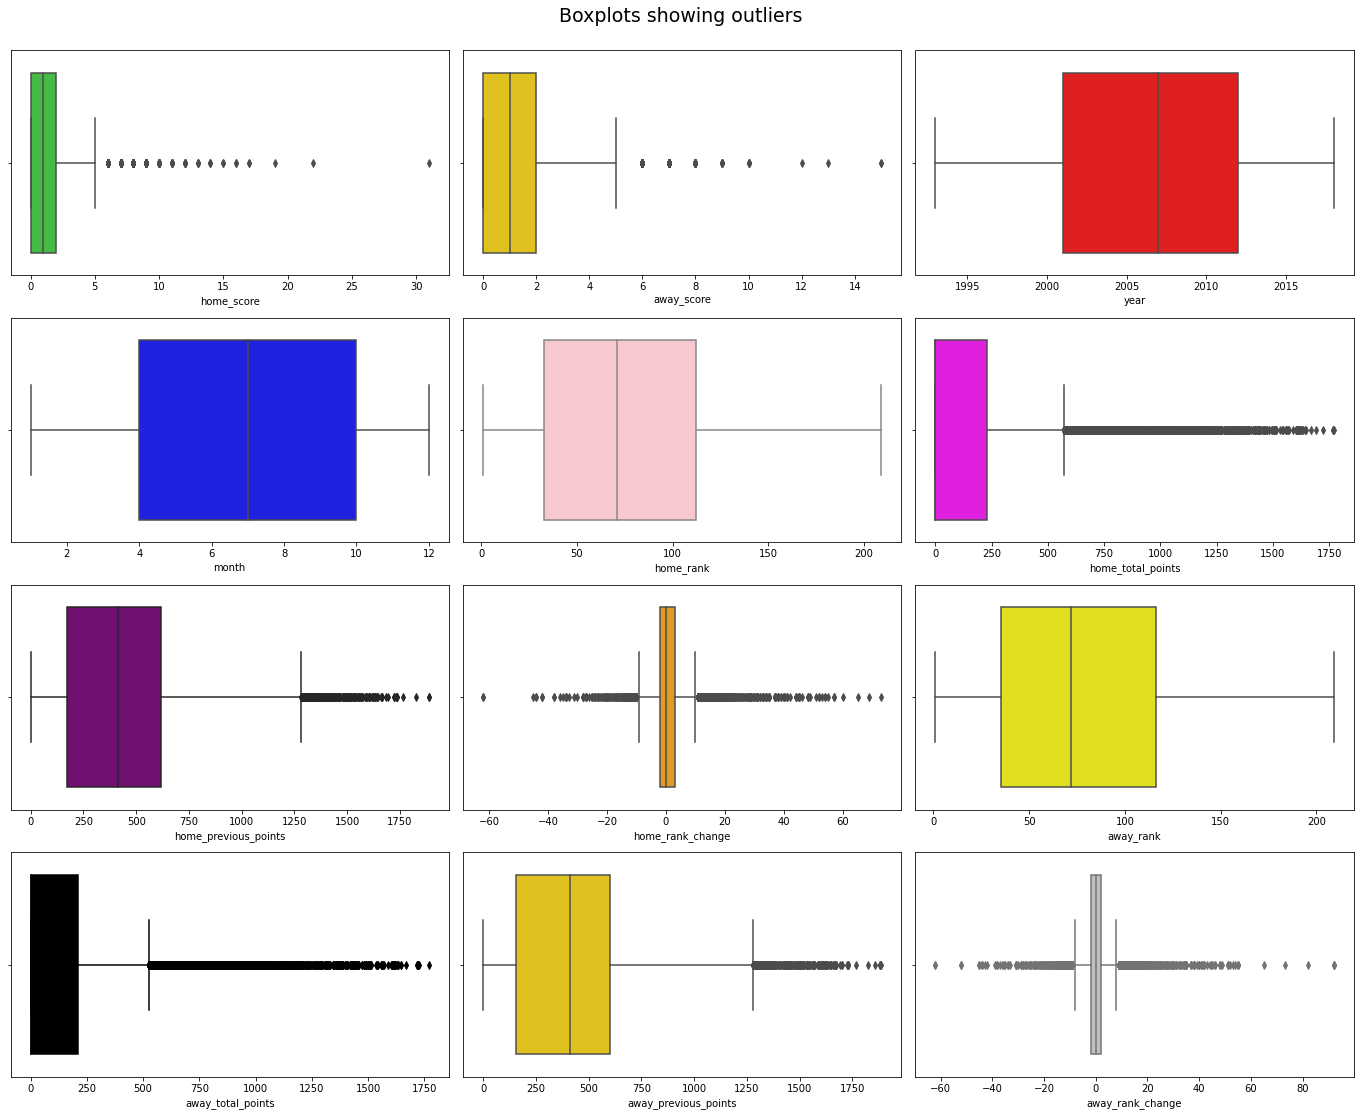

In [46]:
# checking for outliers
fig, axes = plt.subplots(nrows =4, ncols = 3, figsize = (19, 15))
colors = ['limegreen', 'gold', 'red', 'blue', 'pink', 'magenta', 'purple', 'orange','yellow', 'black', 'gold', 'silver']
columns = ['home_score', 'away_score', 'year', 'month', 'home_rank',
       'home_total_points', 'home_previous_points', 'home_rank_change',
       'away_rank', 'away_total_points', 'away_previous_points',
       'away_rank_change']
plt.suptitle('Boxplots showing outliers', y = 1.03, fontsize = 19)
for ax, data, column , color in zip(axes.flatten(), fifa, columns, colors):
    sns.boxplot(fifa[column], ax = ax, color = color)
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


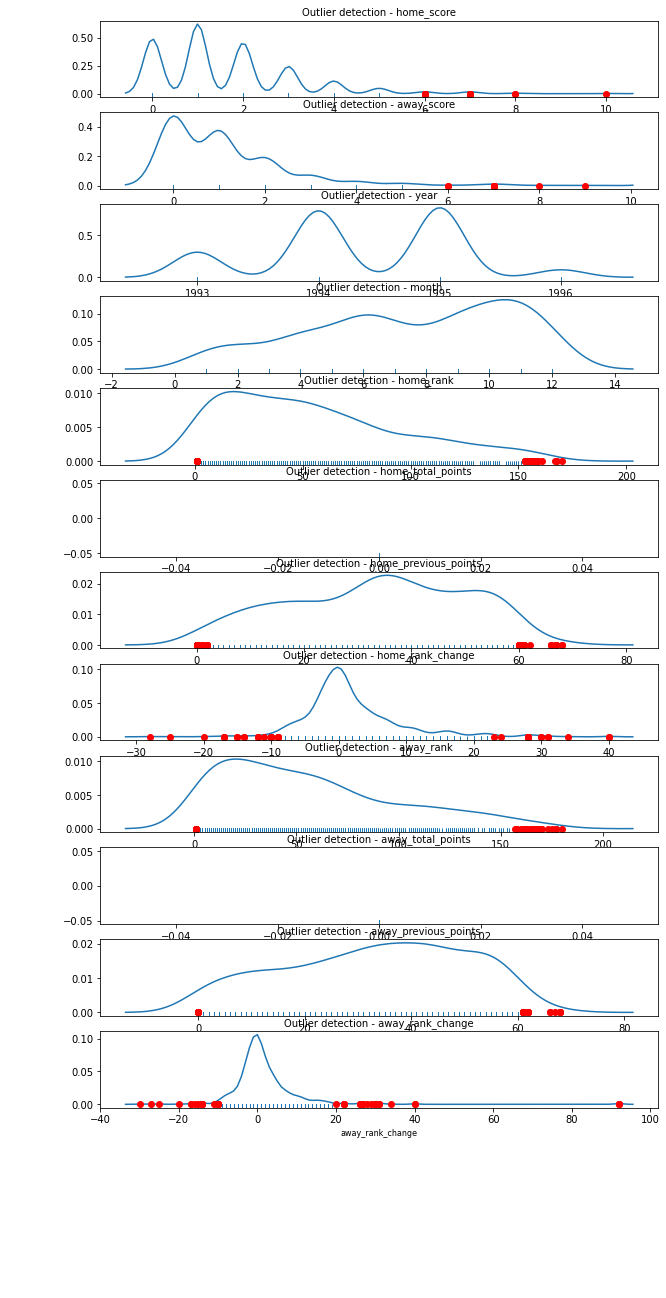

In [47]:
#dealing with outliers using IQR
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['home_score', 'away_score', 'year', 'month', 'home_rank',
       'home_total_points', 'home_previous_points', 'home_rank_change',
       'away_rank', 'away_total_points', 'away_previous_points',
       'away_rank_change']

fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):
    x = fifa[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

The values marked with a dot below in the x-axis of the graph are the ones that are removed from the column based on the set threshold percentile (95 in our case), and is also the default value when it comes to percentile-based outlier removal.

# 6. Exploratory Analysis

### Univariate Analysis

In [48]:
#this shows the descriptive statistics of the dataset
fifa.describe()

,home_score,away_score,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
count,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000,16960.000000
mean,1.603302,1.066745,2006.483491,6.872877,76.089623,165.316293,434.921521,0.944281,79.007783,158.771032,424.513384,0.505071
std,1.615148,1.244232,6.801184,3.275198,50.833075,313.205981,319.307943,6.856022,52.104497,302.935405,317.339963,6.960612
min,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000,0.000000,-62.000000,1.000000,0.000000,0.000000,-62.000000
25%,0.000000,0.000000,2001.000000,4.000000,33.000000,0.000000,174.000000,-2.000000,35.000000,0.000000,155.000000,-2.000000
50%,1.000000,1.000000,2007.000000,7.000000,71.000000,0.000000,416.000000,0.000000,72.000000,0.000000,410.000000,0.000000
75%,2.000000,2.000000,2012.000000,10.000000,112.000000,228.277500,617.000000,3.000000,116.000000,210.157500,604.000000,2.000000
max,31.000000,15.000000,2018.000000,12.000000,209.000000,1770.060000,1887.000000,73.000000,209.000000,1770.060000,1887.000000,92.000000


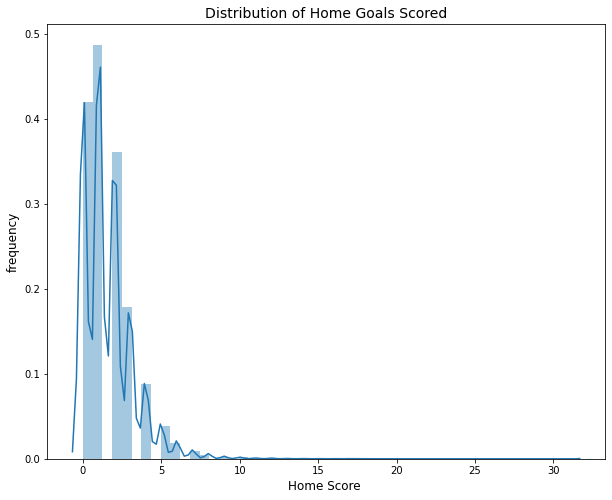

In [49]:
#distribution of homescore
plt.subplots(figsize =  (10,8))
sns.distplot(fifa.home_score,hist = True, norm_hist = True, bins = None)


plt.xlabel('Home Score ', color = 'black', fontsize =12)
plt.ylabel('frequency', color ='black', fontsize = 12)
plt.title('Distribution of Home Goals Scored', color = 'black', fontsize = 14)
plt.show()

Our distribution is positively skewed

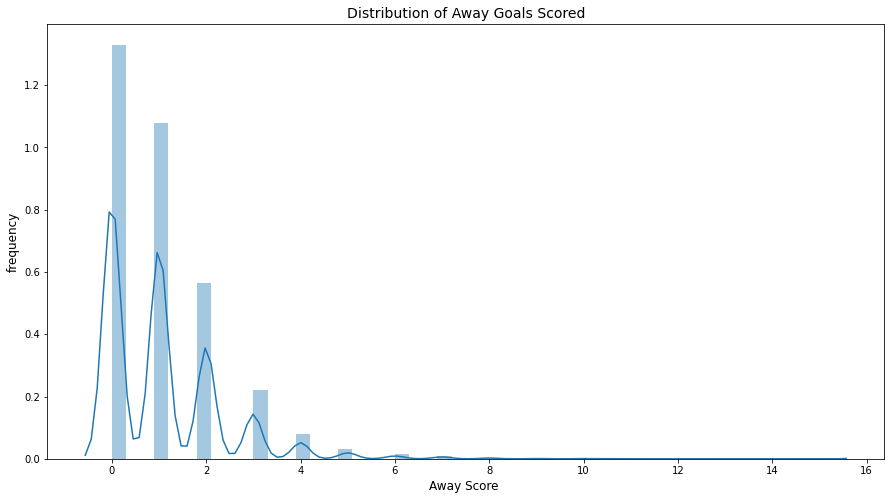

In [50]:
#distribution of away goals score
plt.subplots(figsize =  (15,8))
sns.distplot(fifa.away_score,hist = True,  bins = None)


plt.xlabel('Away Score ', color = 'black', fontsize =12)
plt.ylabel('frequency', color ='black', fontsize = 12)
plt.title('Distribution of Away Goals Scored', color = 'black', fontsize = 14)
plt.show()

The distribution is also positively skewed

### Bivariate Analysis

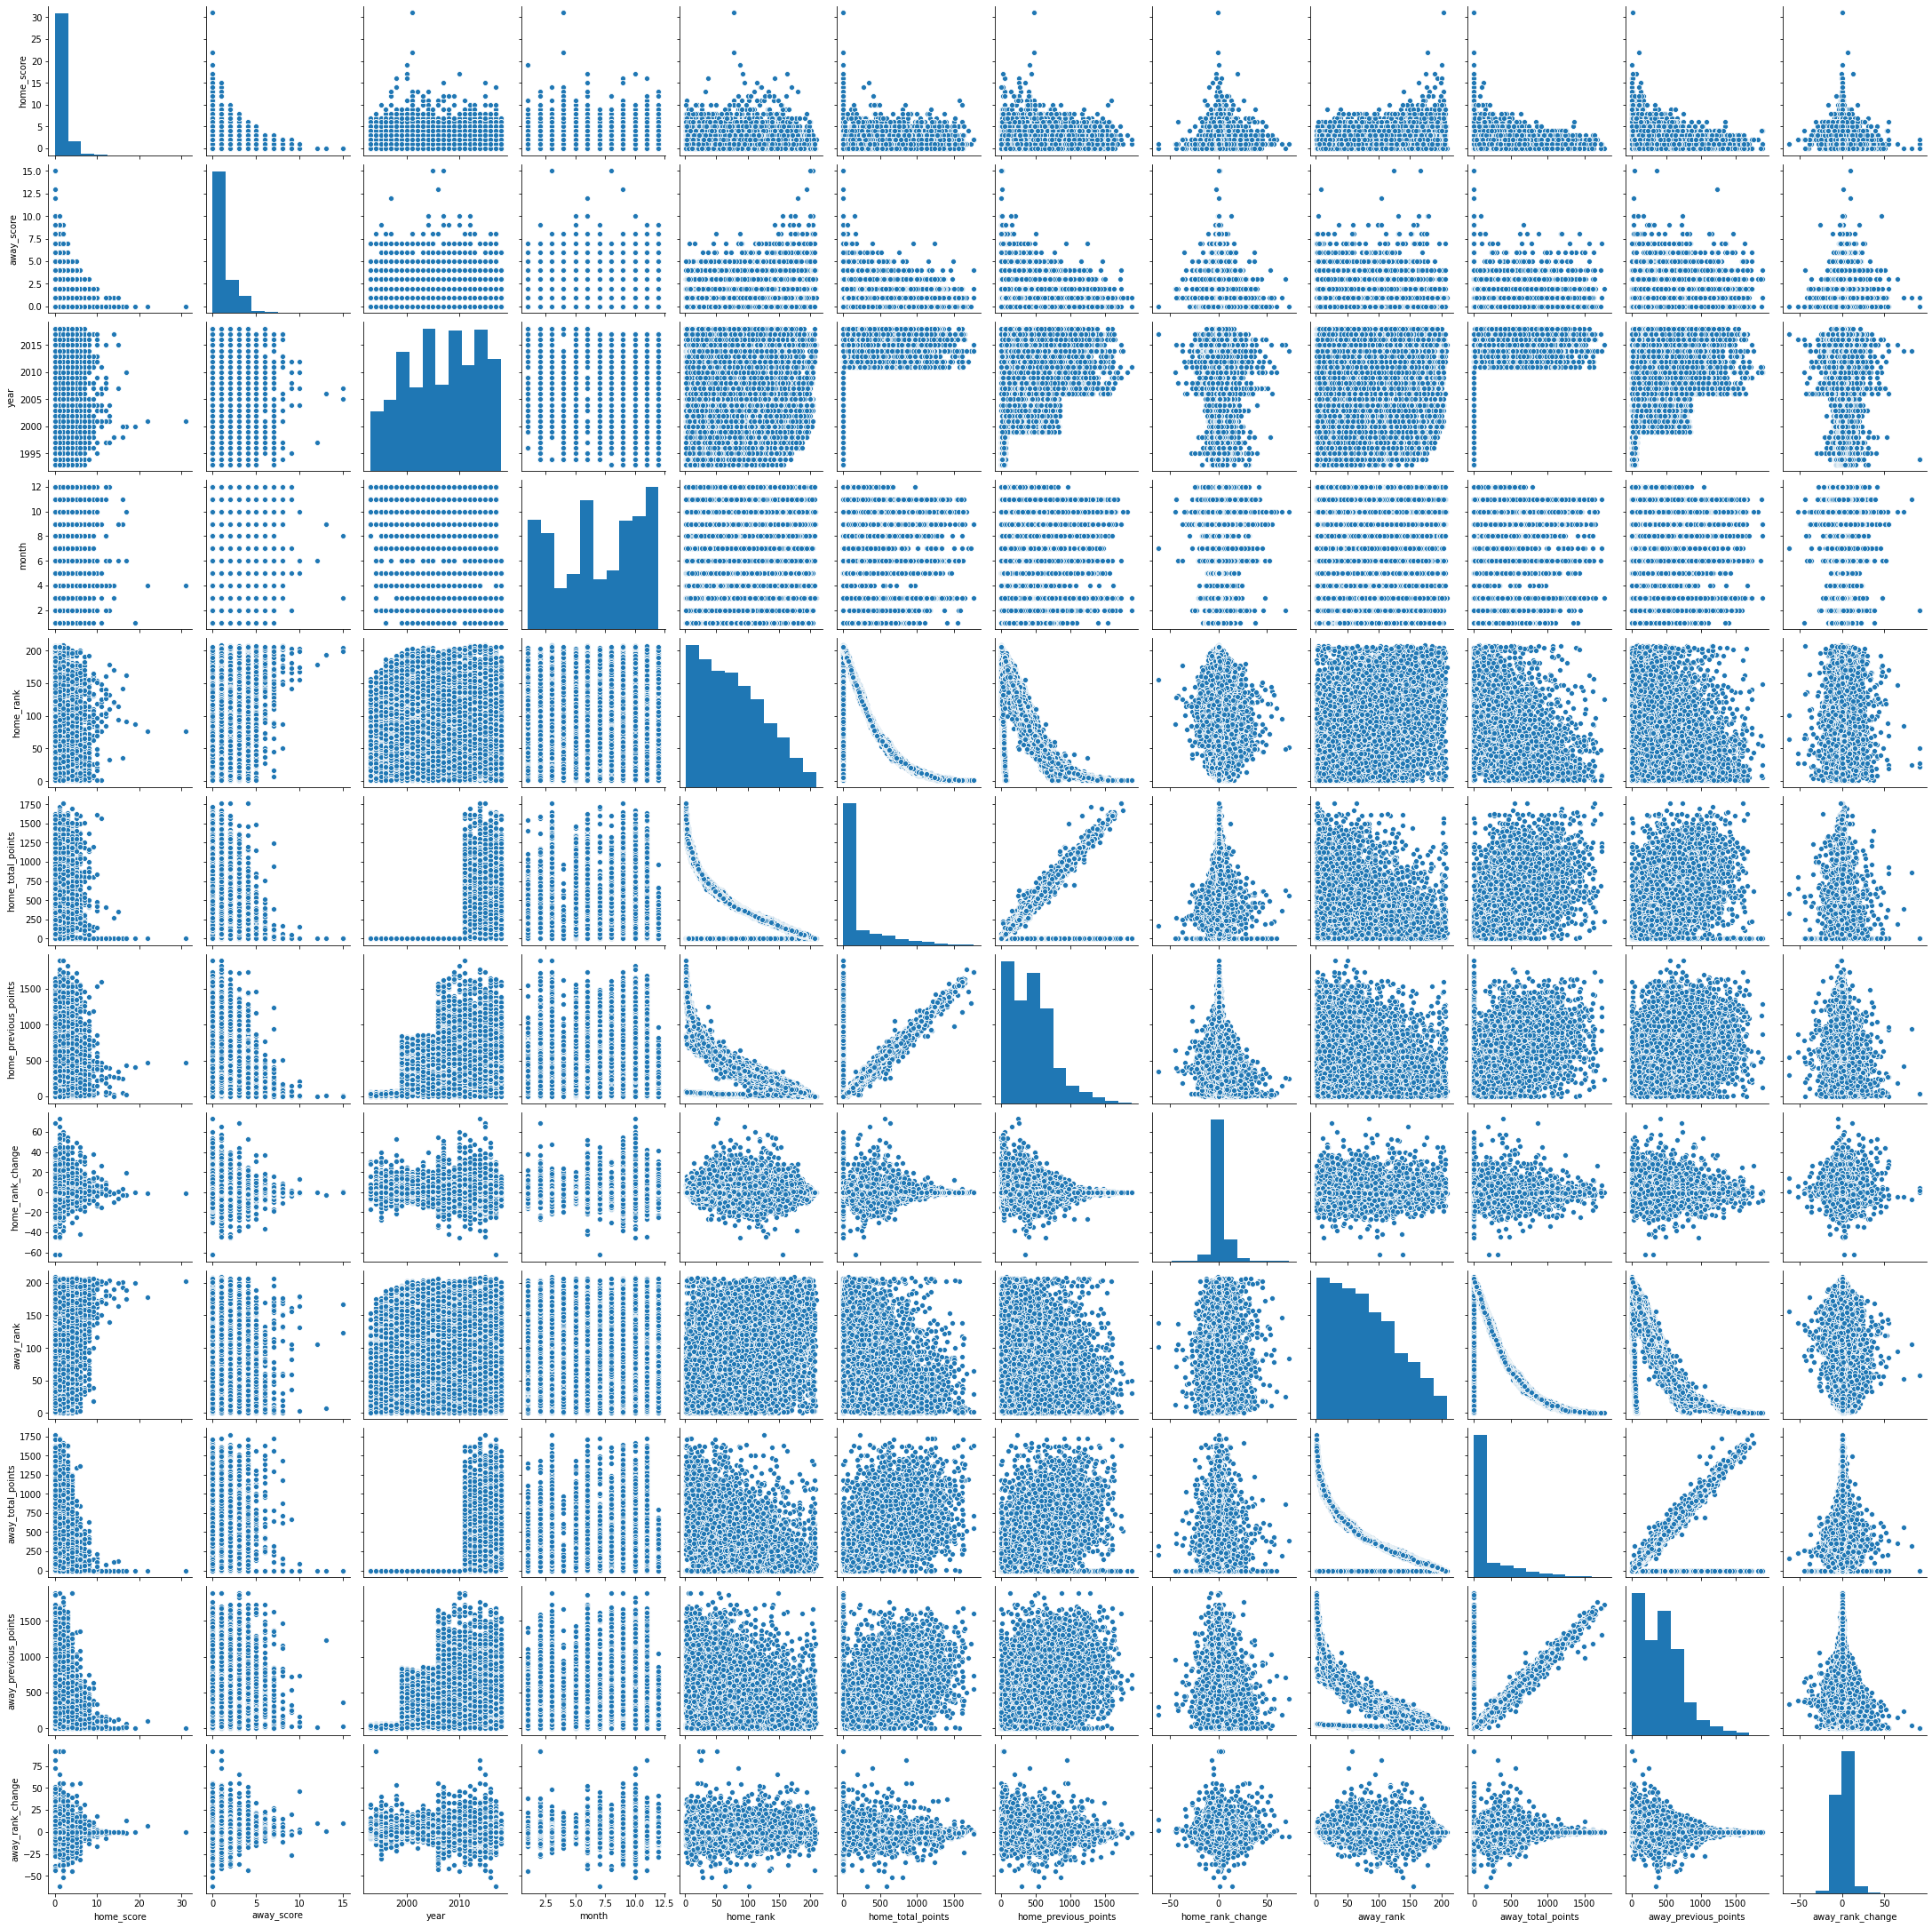

In [51]:
# drawing scatter plots on numeric variables to visualize any correlation

cols= ['home_score', 'away_score', 'year', 'month', 'home_rank',
       'home_total_points', 'home_previous_points', 'home_rank_change',
       'away_rank', 'away_total_points', 'away_previous_points',
       'away_rank_change']

sns.pairplot(fifa[cols])

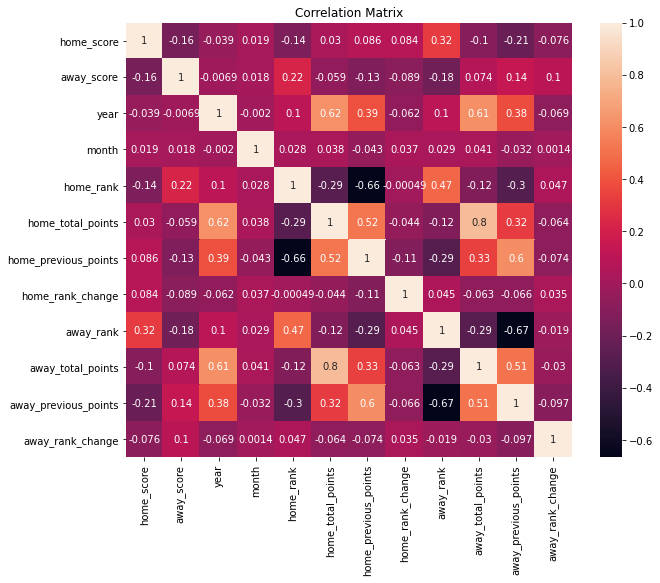

In [52]:
# plotting heatmap to show how our numeric variables correlate
plt.figure(figsize = (10,8))
sns.heatmap(fifa[cols].corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

### Multivariate Analysis



> Principal component analysis (PCA)



In [0]:
#Separating features and labels
X = fifa[['year',	'month',	'home_rank','home_total_points',	'home_previous_points']].values
      
y = fifa['home_score']

In [54]:
#Split the data into a training set and testing set.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(array([[1.995e+03, 4.000e+00, 4.000e+00, 0.000e+00, 6.000e+01],
        [2.012e+03, 6.000e+00, 9.500e+01, 3.587e+02, 3.610e+02],
        [2.004e+03, 9.000e+00, 6.700e+01, 0.000e+00, 5.420e+02],
        ...,
        [2.009e+03, 1.000e+00, 6.800e+01, 0.000e+00, 4.680e+02],
        [2.010e+03, 5.000e+00, 4.000e+00, 0.000e+00, 1.221e+03],
        [1.999e+03, 5.000e+00, 1.630e+02, 0.000e+00, 7.600e+01]]),
 array([[2010.  ,    9.  ,    8.  ,    0.  , 1062.  ],
        [2003.  ,   10.  ,   95.  ,    0.  ,  436.  ],
        [2009.  ,    3.  ,   65.  ,    0.  ,  492.  ],
        ...,
        [2007.  ,    9.  ,   20.  ,    0.  ,  950.  ],
        [2001.  ,    6.  ,  110.  ,    0.  ,  404.  ],
        [2015.  ,    9.  ,   46.  ,  634.73,  627.  ]]),
 681      1
 13725    0
 7415     0
 9226     1
 16877    2
         ..
 10195    1
 14492    2
 10895    2
 11941    2
 3027     4
 Name: home_score, Length: 13568, dtype: int64,
 12055    4
 6521     1
 11083    2
 13754    1
 12       7
         .

In [0]:
#Normalisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Appying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [57]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.44937708, 0.24580517, 0.1997373 , 0.07187396, 0.03320649])

# 7. Implementing the Solution

Feature Engineering

In [58]:
#creating a function for the win ,loss and draw

#We create a new column called goal_difference.
fifa['goal_difference'] = fifa['home_score'] - fifa['away_score']
print(fifa.columns)

#we then create another column for home team result depending on the goal difference.
def status(x):
  if x > 0:
    return 'W'
  elif x < 0:
    return 'L'
  else:
    return 'D'

# creating a new column to give the match oucome
fifa['status'] = fifa.goal_difference.apply(lambda x: status(x))
print(fifa.columns)


# label encoding.
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
fifa['status'] = label_encoder.fit_transform(fifa['status']) 
  
fifa.head()


Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'home_rank',
       'home_total_points', 'home_previous_points', 'home_rank_change',
       'away_rank', 'away_total_points', 'away_previous_points',
       'away_rank_change', 'goal_difference'],
      dtype='object')
Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'year', 'month', 'home_rank',
       'home_total_points', 'home_previous_points', 'home_rank_change',
       'away_rank', 'away_total_points', 'away_previous_points',
       'away_rank_change', 'goal_difference', 'status'],
      dtype='object')


,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,goal_difference,status
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,67.0,0.0,22.0,1.0,0,0
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,5.0,0.0,51.0,5.0,1,2
2,Colombia,Peru,4,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,70.0,0.0,16.0,8.0,4,2
3,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,0.0,16,8,5.0,0.0,51.0,5.0,-1,1
4,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993,8,70,0.0,16,8,19.0,0.0,36.0,16.0,-1,1


In [59]:
# encoding the tournament column
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
fifa['tournament'] = lb_make.fit_transform(fifa['tournament'])
fifa.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,goal_difference,status
0,Colombia,Paraguay,0,0,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,67.0,0.0,22.0,1.0,0,0
1,Colombia,Argentina,2,1,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,5.0,0.0,51.0,5.0,1,2
2,Colombia,Peru,4,0,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,70.0,0.0,16.0,8.0,4,2
3,Peru,Argentina,0,1,26,Lima,Peru,False,1993,8,70,0.0,16,8,5.0,0.0,51.0,5.0,-1,1
4,Peru,Colombia,0,1,26,Lima,Peru,False,1993,8,70,0.0,16,8,19.0,0.0,36.0,16.0,-1,1


In [60]:
# encoding the home team column


lb_make = LabelEncoder()
fifa['home_team'] = lb_make.fit_transform(fifa['home_team'])
fifa.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,goal_difference,status
0,41,Paraguay,0,0,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,67.0,0.0,22.0,1.0,0,0
1,41,Argentina,2,1,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,5.0,0.0,51.0,5.0,1,2
2,41,Peru,4,0,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,70.0,0.0,16.0,8.0,4,2
3,138,Argentina,0,1,26,Lima,Peru,False,1993,8,70,0.0,16,8,5.0,0.0,51.0,5.0,-1,1
4,138,Colombia,0,1,26,Lima,Peru,False,1993,8,70,0.0,16,8,19.0,0.0,36.0,16.0,-1,1


In [61]:
# encoding the away team column


lb_make = LabelEncoder()
fifa['away_team'] = lb_make.fit_transform(fifa['away_team'])
fifa.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,goal_difference,status
0,41,137,0,0,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,67.0,0.0,22.0,1.0,0,0
1,41,8,2,1,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,5.0,0.0,51.0,5.0,1,2
2,41,138,4,0,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,70.0,0.0,16.0,8.0,4,2
3,138,8,0,1,26,Lima,Peru,False,1993,8,70,0.0,16,8,5.0,0.0,51.0,5.0,-1,1
4,138,41,0,1,26,Lima,Peru,False,1993,8,70,0.0,16,8,19.0,0.0,36.0,16.0,-1,1


### Approach 1: Polynomial approach

Model 1: Predict how many goals the home team scores

In [62]:
#checking for multicollinearity
# Let's display the correlations between the variables
coef = fifa.corr()

coef

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,goal_difference,status
home_team,1.000000,0.011767,0.016519,-0.032386,-0.046807,-0.048699,0.002853,0.038969,-0.003207,-0.024212,-0.023622,-0.004491,0.061591,-0.025417,-0.045180,-0.001653,0.030528,0.010145
away_team,0.011767,1.000000,-0.043257,0.016106,-0.037326,0.039011,-0.008742,0.022257,0.050455,-0.024467,-0.044760,-0.004372,-0.008271,-0.023070,-0.020975,-0.000678,-0.040979,-0.020702
home_score,0.016519,-0.043257,1.000000,-0.163344,-0.014417,-0.041930,-0.038864,0.018958,-0.135519,0.029615,0.085592,0.084348,0.318637,-0.102645,-0.214791,-0.075642,0.828825,0.519334
away_score,-0.032386,0.016106,-0.163344,1.000000,0.030073,0.101189,-0.006852,0.017869,0.220822,-0.059484,-0.129705,-0.089176,-0.180813,0.073662,0.142189,0.100332,-0.687376,-0.240944
tournament,-0.046807,-0.037326,-0.014417,0.030073,1.000000,-0.080522,-0.060048,0.088720,-0.146303,0.021386,0.118832,-0.059298,-0.157606,0.026610,0.128932,-0.019652,-0.027669,-0.005162
neutral,-0.048699,0.039011,-0.041930,0.101189,-0.080522,1.000000,0.043983,-0.104658,0.036468,0.036622,-0.001299,0.018275,0.046110,0.027480,-0.023415,0.052540,-0.088255,-0.045675
year,0.002853,-0.008742,-0.038864,-0.006852,-0.060048,0.043983,1.000000,-0.001974,0.103965,0.619923,0.390794,-0.061511,0.104293,0.613570,0.376170,-0.068765,-0.024725,-0.017966
month,0.038969,0.022257,0.018958,0.017869,0.088720,-0.104658,-0.001974,1.000000,0.028324,0.037594,-0.043362,0.037341,0.029401,0.041267,-0.031636,0.001417,0.003823,0.013121
home_rank,-0.003207,0.050455,-0.135519,0.220822,-0.146303,0.036468,0.103965,0.028324,1.000000,-0.289373,-0.663282,-0.000493,0.470136,-0.124959,-0.297491,0.046846,-0.225001,-0.116162
home_total_points,-0.024212,-0.024467,0.029615,-0.059484,0.021386,0.036622,0.619923,0.037594,-0.289373,1.000000,0.524183,-0.044055,-0.121239,0.797405,0.318099,-0.063845,0.055537,0.030883


The above table shows how each variable relates to another. The coefficient of 1 across the diagonal shows that a variable is perfectly correlated to itself. The matrix will be used to compute the VIF (Variance Inflation Factor) score for each variable, by finding the inverse matrix of the correlations matrix.

In [63]:
#compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(coef.values), index = coef.index, columns=coef.columns)

,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,goal_difference,status
home_team,1.015572,-0.014626,1.847070e-02,1.754543e-03,0.047525,0.050635,-0.046144,-0.038462,0.142079,0.043916,0.103104,0.018844,-0.128785,-0.004100,-0.056240,-0.006491,-3.202176e-03,0.008545
away_team,-0.014626,1.010518,-5.829665e-03,3.308564e-02,0.033005,-0.041484,-0.019670,-0.030780,-0.087445,-0.016641,-0.026812,0.004812,0.104488,0.044885,0.068795,0.013455,4.260844e-02,-0.007680
home_score,0.018375,-0.005718,4.609700e+12,-3.551089e+12,0.011115,0.246050,0.095053,0.036028,0.536387,-0.064189,0.108874,-0.100481,-0.670778,0.003147,-0.142738,0.055776,-6.261570e+12,0.404285
away_score,0.001804,0.033050,-3.551089e+12,2.735586e+12,-0.041026,-0.275459,0.132687,-0.066760,-0.602824,0.047485,-0.151318,0.120401,0.386066,-0.099380,0.005717,-0.097352,4.823609e+12,-0.631090
tournament,0.047525,0.033005,1.110022e-02,-4.101517e-02,1.062999,0.066967,0.114362,-0.099082,0.061620,-0.008303,-0.061552,0.055534,0.040658,0.001682,-0.085390,0.010997,-7.829063e-03,-0.014101
neutral,0.050635,-0.041484,2.459542e-01,-2.753847e-01,0.066967,1.045971,-0.002846,0.108754,0.034848,-0.027231,-0.035470,-0.036110,-0.103006,-0.029657,0.035359,-0.039415,-2.586525e-01,0.018221
year,-0.046144,-0.019670,9.542451e-02,1.324010e-01,0.114362,-0.002846,2.887597,0.050454,-1.004776,-0.848014,-0.894117,-0.021985,-0.983045,-0.783689,-0.829283,0.008004,7.635895e-02,-0.003410
month,-0.038462,-0.030780,3.603410e-02,-6.676474e-02,-0.099082,0.108754,0.050454,1.034601,0.001655,-0.076938,0.070302,-0.042107,-0.066297,-0.053494,-0.007868,-0.004929,-5.678930e-02,-0.002851
home_rank,0.142079,-0.087445,5.381436e-01,-6.041773e-01,0.061620,0.034848,-1.004776,0.001655,4.202209,-0.239386,3.666569,0.268751,-2.424229,0.693187,-2.313504,-0.181668,-1.698699e-01,0.065681
home_total_points,0.043916,-0.016641,-6.558957e-02,4.856324e-02,-0.008303,-0.027231,-0.848014,-0.076938,-0.239386,5.410902,-2.790984,-0.242137,0.758539,-4.122020,2.825210,0.265461,7.884149e-02,0.005201


In [64]:
fifa.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,goal_difference,status
0,41,137,0,0,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,67.0,0.0,22.0,1.0,0,0
1,41,8,2,1,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,5.0,0.0,51.0,5.0,1,2
2,41,138,4,0,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,70.0,0.0,16.0,8.0,4,2
3,138,8,0,1,26,Lima,Peru,False,1993,8,70,0.0,16,8,5.0,0.0,51.0,5.0,-1,1
4,138,41,0,1,26,Lima,Peru,False,1993,8,70,0.0,16,8,19.0,0.0,36.0,16.0,-1,1


In [0]:
# Performing Data Preprocessing

X = fifa[['home_team','home_rank','tournament']].values

y = fifa['home_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)


In [66]:
# fitting the polynomial regressor 
pol_reg = PolynomialFeatures(degree = 2)
X_train_poly = pol_reg.fit_transform(X_train)
X_test_poly = pol_reg.fit_transform(X_test)
pol_reg.fit(X_train_poly, y_train)

pol_regressor = LinearRegression()
pol_regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# Prints y-intercept
print(pol_regressor.intercept_)

# Prints the beta coefficients in order
print(pol_regressor.coef_)

2.3567775458403313
[ 0.00000000e+00 -2.32732253e-03 -7.99638773e-03 -1.42439793e-02
  1.49985310e-06  2.63989894e-05  1.79232761e-05  1.23418345e-05
 -3.50238001e-05  1.79765128e-04]


In [0]:
# making predictions 
y_pred = np.round(pol_regressor.predict(X_test_poly),3)

In [69]:
# making comparison
compare = pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare.head())
compare.describe()

       Actual  Predicted
920         3      1.992
972         1      1.765
54          2      1.780
10225       3      1.463
10251       4      1.671


,Actual,Predicted
count,5088.000000,5088.000000
mean,1.618711,1.604509
std,1.607574,0.231396
min,0.000000,0.623000
25%,0.000000,1.450750
50%,1.000000,1.618000
75%,2.000000,1.766250
max,19.000000,2.161000


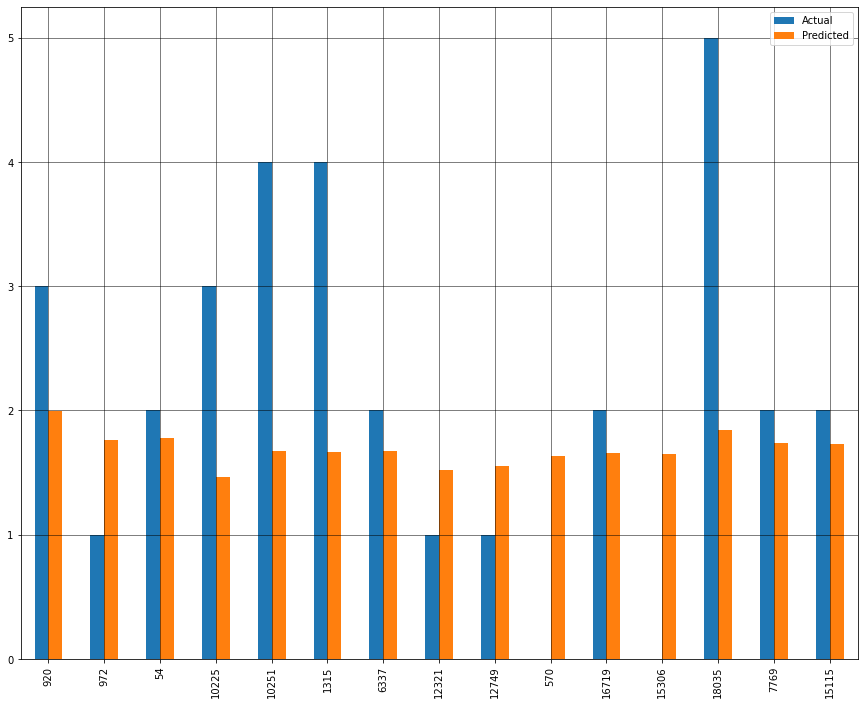

In [70]:
# comparative bar graph to show 
df = compare.head(15)
df.plot(kind = 'bar', figsize = (15,12))
plt.grid(which = 'major',linestyle = '-', linewidth = '0.5', color = 'black')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'grey')

Evaluating The Model

In [71]:
# compare to the RMSE
# metrics
print('Mean Absolute Error:', np.round((metrics.mean_absolute_error(y_test,y_pred)),4))
print('Mean Squared Error:', np.round((metrics.mean_squared_error(y_test,y_pred)),4))
print('Root Mean Squared Error:', np.round(np.sqrt((metrics.mean_squared_error(y_test,y_pred))),4))

Mean Absolute Error: 1.1669
Mean Squared Error: 2.519
Root Mean Squared Error: 1.5872


In [72]:
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

# statistical description
residual = pd.DataFrame(residuals).describe()

# mean 
residuals.mean()

-0.014201257861635232

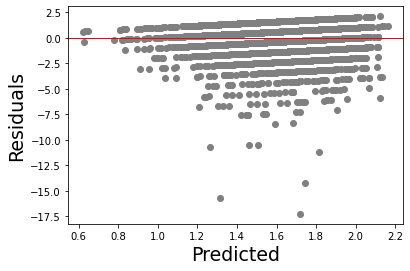

In [73]:
# residual plot
plt.scatter(y_pred, residuals, color = 'grey')
plt.ylabel('Residuals', fontsize = 19)
plt.xlabel('Predicted', fontsize = 19)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 1)
plt.show()

There is no pattern hence no heteroskedasticity

In [74]:
#using the barlett's Test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")

The variances are homogeneous!


Model 2: Predict how many goals the away team scores.

In [0]:
# Performing Data Preprocessing

l = fifa[['away_team', 'away_rank','tournament']].values

k = fifa['away_score']

l_train, l_test, k_train, k_test = train_test_split(l, k, random_state = 10, test_size = 0.3)

In [76]:
# fitting the polynomial regressor 
pol_reg = PolynomialFeatures(degree = 2)
l_train_poly = pol_reg.fit_transform(l_train)
l_test_poly = pol_reg.fit_transform(l_test)
pol_reg.fit(l_train_poly, k_train)

pol_regressor = LinearRegression()
pol_regressor.fit(l_train_poly, k_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
# Prints y-intercept
print(pol_regressor.intercept_)

# Prints the beta coefficients in order
print(pol_regressor.coef_)

1.6923120404947392
[ 0.00000000e+00 -2.87803304e-03 -1.05023583e-02 -2.20607052e-03
  1.10504220e-05  1.60952735e-05 -4.98359491e-06  2.89788584e-05
 -2.41035787e-05  9.05848714e-05]


In [0]:
# making predictions 
k_pred = np.round(pol_regressor.predict(l_test_poly),3)

In [79]:
# making comparison
compare = pd.DataFrame({'Actual':k_test , 'Predicted': k_pred}) 
print(compare.head())
compare.describe()

       Actual  Predicted
920         0      1.032
972         0      1.007
54          0      1.130
10225       0      0.791
10251       2      0.790


,Actual,Predicted
count,5088.000000,5088.000000
mean,1.068003,1.068640
std,1.210860,0.250749
min,0.000000,0.620000
25%,0.000000,0.867000
50%,1.000000,1.034000
75%,2.000000,1.255000
max,9.000000,1.782000


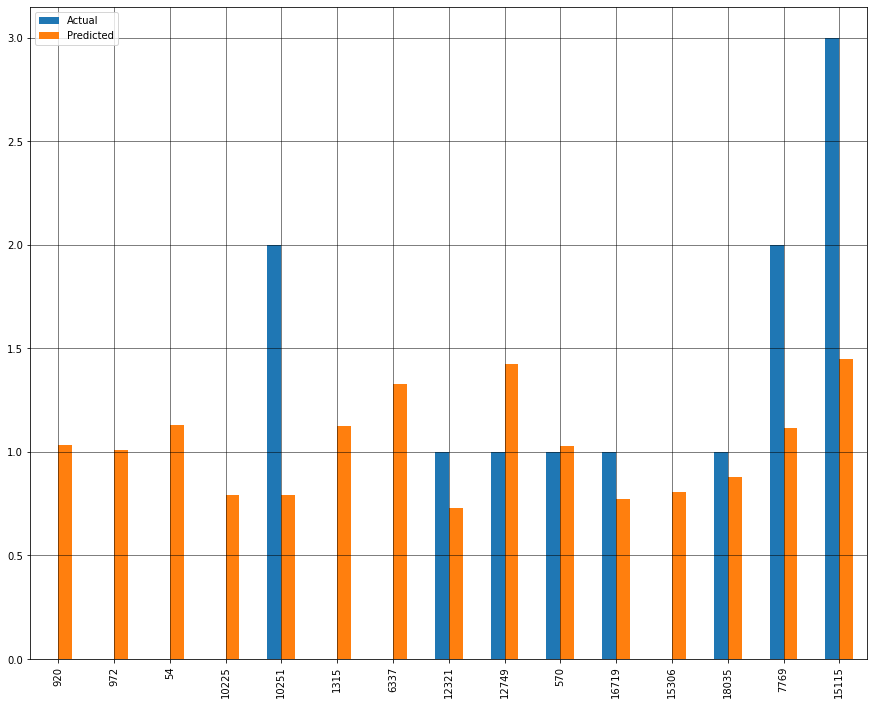

In [80]:
# comparative bar graph to show 
df = compare.head(15)
df.plot(kind = 'bar', figsize = (15,12))
plt.grid(which = 'major',linestyle = '-', linewidth = '0.5', color = 'black')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'grey')

Evaluating The Model

In [81]:
# compare to the RMSE
# metrics
print('Mean Absolute Error:', np.round((metrics.mean_absolute_error(k_test,k_pred)),4))
print('Mean Squared Error:', np.round((metrics.mean_squared_error(k_test,k_pred)),4))
print('Root Mean Squared Error:', np.round(np.sqrt((metrics.mean_squared_error(k_test,k_pred))),4))

Mean Absolute Error: 0.8952
Mean Squared Error: 1.4173
Root Mean Squared Error: 1.1905


In [82]:
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(k_pred, k_test)

# statistical description
residual = pd.DataFrame(residuals).describe()

# mean 
residuals.mean()

0.0006371855345912064

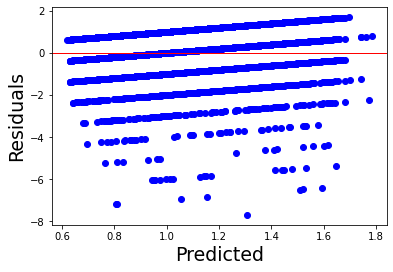

In [83]:
# residual plot
plt.scatter(k_pred, residuals, color = 'blue')
plt.ylabel('Residuals', fontsize = 19)
plt.xlabel('Predicted', fontsize = 19)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 1)
plt.show()

There is no pattern hence no heteroskedasticity

In [84]:
#using the barlett's Test
import scipy as sp

test_result, p_value = sp.stats.bartlett(k_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(k_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")

The variances are homogeneous!




> Conclusion


*   The models used cannot accurately predict the goals scored by either team as the accuracy registered is too low thus unreliable.






### Approach 2: Logistic approach

Determine from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [85]:
fifa.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,goal_difference,status
0,41,137,0,0,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,67.0,0.0,22.0,1.0,0,0
1,41,8,2,1,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,5.0,0.0,51.0,5.0,1,2
2,41,138,4,0,26,Barranquilla,Colombia,False,1993,8,19,0.0,36,16,70.0,0.0,16.0,8.0,4,2
3,138,8,0,1,26,Lima,Peru,False,1993,8,70,0.0,16,8,5.0,0.0,51.0,5.0,-1,1
4,138,41,0,1,26,Lima,Peru,False,1993,8,70,0.0,16,8,19.0,0.0,36.0,16.0,-1,1


In [0]:
# splitting the training and test variables
s = fifa[['home_team']].values
t = fifa[['status']]

s_train, s_test, t_train, t_test = train_test_split(s, t, random_state = 0, test_size = 0.2)

In [87]:
#  Applying and training the model
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
logreg = LogisticRegression()
logreg.fit(s_train, t_train)

# Predicting the results

t_pred = logreg.predict(s_test)


# Evaluating the performance of the model
#
print('The accuracy of the model is',  accuracy_score(t_test, t_pred))
confusion_matrix(t_test, t_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the model is 0.47553066037735847


array([[   0,    0,  822],
       [   0,    0,  957],
       [   0,    0, 1613]])

In [88]:
# We will use the rmse score to evaluate 

print('Mean Absolute Error:', metrics.mean_absolute_error(t_test, t_pred))
print('Mean Squared Error:', metrics.mean_squared_error(t_test, t_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(t_test, t_pred)))

Mean Absolute Error: 0.7668042452830188
Mean Squared Error: 1.2514740566037736
Root Mean Squared Error: 1.1186930126731702




> Conclusion

*   The model has an accuracy of 48 % .

*   This shows the model is not fit to make predictions if the game is a Win, Lose or Draw.





# 8. Challenging the solution





1.   Try and fit other models to see if I can get better predictions

2.  Incoporate the art of hyperparameter tuning and apply to my models
3. Gauge the features to be used based on the importance of each feature.




# 9. Follow up questions

### a). Did we have the right data?

The data was right it just didnt give the accurate prediction score, this could be solved by using a different model.

### b). Do we need other data to answer our question?

Yes, our target variables are not normally distributed and the use of current ranking would be helpful to make near future predictions

### c). Did we have the right question?

The questions were right the data given was not enough to answer them accurately. Probably more data needs to be sought so as to improve the model and provide meaningful predictions.